In [1]:
import numpy as np
import pandas as pd
import re
import glob #this makes a list of all the files in a directory
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import *

In [2]:
with_gender = pd.read_pickle("WithGenderFinal.p")
with_gender['gender'].value_counts()
line_column=[]
for i in with_gender.index:
        line_column.append(' '.join(with_gender['Speech'][i]))
with_gender['Line']=line_column

with_gender['linelength']=with_gender['Line'].str.len()
with_gender_dum = pd.get_dummies(with_gender['gender'])
with_gender = pd.concat([with_gender, with_gender_dum],axis=1).drop(['F','gender'],1)

In [4]:
with_gender['M'].value_counts()

1    201934
0     84804
Name: M, dtype: int64

In [7]:
with_gender_shuffle = shuffle(with_gender, random_state = 5)


# Randomly split into training and dev with scikit-learn helper function
train, test = train_test_split(with_gender_shuffle, test_size=0.2, random_state=100)
dev, test = train_test_split(test, test_size=0.5, random_state=200)

print train.shape
print dev.shape
print test.shape

(229390, 9)
(28674, 9)
(28674, 9)


In [8]:
train_y, dev_y, test_y = train.M, dev.M, test.M
train_X = train.drop(['M','Speech','LineID','pkey','linelength'],1)
dev_X = dev.drop(['M','Speech','LineID','pkey','linelength'],1)
test_X = test.drop(['M','Speech','LineID','pkey','linelength'],1)
dev_X.head()

,Char,Title,Genre,Line
151043,GARY,antitrust,Crime,The purpose of this company isn't to destroy o...
62727,NADIA,birthdaygirl,Crime,I know you just want to punish me --
203327,MARTY,marty,Romance,I like you. I like you. I been telling you all...
39225,JENNIFER,scream3,Mystery,"Sidney, what happened?"
102806,BLOOM,producerthe,Comedy,I never should have listened to you.


In [9]:
test_X[400:500]['Line']

24724     We all know the traditional model of a terrori...
260205                           (beat) Who's your brother?
209583                                                Yeah.
106016                                        Ashley, wait!
46228                             You can't be late though.
156678           No, sir. Pediatric convention in Delaware.
33287                              Stage IV thyroid cancer.
239395    (On phone) Damn it! That simply won't-- Richar...
200956    You see, that picture is worth any number of s...
121333    (getting a little excitable) I mean it. The ca...
94220                                            Certainly.
119184               Come on, honey, let's get out of here.
229489                                     Congratulations.
128465                                 Feel like traveling?
22660                       Don't fucking yell at me, Paul.
143621    I remember everything until we crashed. I know...
262295    I don't want to say I told you

In [10]:
labels= train_y.values.reshape(-1,1)
labels_dev=dev_y.values.reshape(-1,1)
labels_test = test_y.values.reshape(-1,1)
print('labels shape:', labels.shape)
print('labels_test shape:', labels_test.shape)
print('labels_dev shape:', labels_dev.shape)

('labels shape:', (229390, 1))
('labels_test shape:', (28674, 1))
('labels_dev shape:', (28674, 1))


In [11]:
labels_test[400:500]

array([[0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
    

In [11]:
pwd

u'/home/icwang/projects/w266_final_project'

In [12]:
ching = pd.read_csv('ching_manual_pred.csv', header=None)
michelle = pd.read_csv('michelle_manual_pred.csv', header=None)
nikki = pd.read_csv('manual_pred_nikki.csv', header=None)

In [19]:
print ching.head()
print michelle.head()
print nikki.head()

        0  1                                                  2
0   24724  M  We all know the traditional model of a terrori...
1  260205  F                         (beat) Who's your brother?
2  209583  M                                              Yeah.
3  106016  M                                      Ashley, wait!
4   46228  M                          You can't be late though.
   0       1                                                  2
0  M   24724  We all know the traditional model of a terrori...
1  M  260205                         (beat) Who's your brother?
2  M  209583                                              Yeah.
3  F  106016                                      Ashley, wait!
4  M   46228                          You can't be late though.
   0       1                                                  2
0  M   24724  We all know the traditional model of a terrori...
1  M  260205                         (beat) Who's your brother?
2  M  209583                            

In [126]:
predictions

,true,ching,michelle,nikki
0,1,1,1,1
1,1,0,1,1
2,1,1,1,1
3,1,1,0,1
4,1,1,1,1
5,1,1,1,1
6,1,1,1,1
7,1,1,1,1
8,1,0,0,0
9,1,1,0,0


In [60]:
predictions = pd.DataFrame(columns = ['true','ching', 'michelle', 'nikki'])
#predictions['true'] = labels_test[400:500]
predictions['true'] = data=labels_test[400:500].tolist()
predictions['ching'] = ching[1]
predictions['michelle'] = michelle[0]
predictions['nikki'] = nikki[0]
true_line = test_X[400:500].reset_index(drop=True)
predictions = pd.concat([true_line,predictions],1)

In [61]:
predictions.head()

,Char,Title,Genre,Line,true,ching,michelle,nikki
0,ELISE,siegethe,Drama,We all know the traditional model of a terrori...,[0],M,M,M
1,STEPHEN,backdraft,Mystery,(beat) Who's your brother?,[1],F,M,M
2,MICKEY,hannahandhersisters,Romance,Yeah.,[1],M,M,M
3,BRET,eightleggedfreaks,Sci-Fi,"Ashley, wait!",[1],M,F,M
4,KATHLEEN,punchdrunklove,Romance,You can't be late though.,[0],M,M,M


In [62]:
for i in range(len(predictions)):
    print predictions['true'][i]
    if predictions['true'][i] == [0]:
        predictions['true'][i] = 0
    else:
        predictions['true'][i] = 1

for i in range(len(predictions)):
    if predictions['ching'][i] == 'M':
        predictions['ching'][i] = 1
    else:
        predictions['ching'][i] = 0
        
for i in range(len(predictions)):
    if predictions['michelle'][i] == 'M':
        predictions['michelle'][i] = 1
    else:
        predictions['michelle'][i] = 0
        
for i in range(len(predictions)):
    if predictions['nikki'][i] == 'M':
        predictions['nikki'][i] = 1
    else:
        predictions['nikki'][i] = 0        

[0]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[0]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


In [63]:
predictions.head()

,Char,Title,Genre,Line,true,ching,michelle,nikki
0,ELISE,siegethe,Drama,We all know the traditional model of a terrori...,0,1,1,1
1,STEPHEN,backdraft,Mystery,(beat) Who's your brother?,1,0,1,1
2,MICKEY,hannahandhersisters,Romance,Yeah.,1,1,1,1
3,BRET,eightleggedfreaks,Sci-Fi,"Ashley, wait!",1,1,0,1
4,KATHLEEN,punchdrunklove,Romance,You can't be late though.,0,1,1,1


In [64]:
ching_correct = 0
michelle_correct = 0
nikki_correct = 0
for i in range(len(predictions)):
    if str(predictions['ching'][i]) == str(predictions['true'][i]):
        ching_correct += 1
    if str(predictions['michelle'][i]) == str(predictions['true'][i]):
        michelle_correct += 1    
    if str(predictions['nikki'][i]) == str(predictions['true'][i]):
        nikki_correct += 1 

print ching_correct, michelle_correct, nikki_correct


71 66 72


In [65]:
accuracies = {}
for i in range(len(predictions)):
    accuracies[i] = 0
    if str(predictions['ching'][i]) == str(predictions['true'][i]):
        accuracies[i] += 1
    if str(predictions['michelle'][i]) == str(predictions['true'][i]):
        accuracies[i] += 1 
    if str(predictions['nikki'][i]) == str(predictions['true'][i]):
        accuracies[i] += 1 
        
accuracies

{0: 0,
 1: 2,
 2: 3,
 3: 2,
 4: 0,
 5: 3,
 6: 0,
 7: 3,
 8: 0,
 9: 1,
 10: 3,
 11: 0,
 12: 3,
 13: 2,
 14: 2,
 15: 2,
 16: 1,
 17: 3,
 18: 3,
 19: 3,
 20: 2,
 21: 2,
 22: 3,
 23: 2,
 24: 2,
 25: 2,
 26: 3,
 27: 2,
 28: 2,
 29: 2,
 30: 0,
 31: 3,
 32: 3,
 33: 2,
 34: 2,
 35: 1,
 36: 1,
 37: 3,
 38: 2,
 39: 1,
 40: 3,
 41: 2,
 42: 3,
 43: 3,
 44: 1,
 45: 3,
 46: 2,
 47: 1,
 48: 1,
 49: 3,
 50: 2,
 51: 3,
 52: 3,
 53: 2,
 54: 2,
 55: 2,
 56: 2,
 57: 2,
 58: 2,
 59: 3,
 60: 3,
 61: 2,
 62: 3,
 63: 2,
 64: 1,
 65: 0,
 66: 2,
 67: 2,
 68: 3,
 69: 2,
 70: 1,
 71: 3,
 72: 1,
 73: 3,
 74: 3,
 75: 3,
 76: 1,
 77: 2,
 78: 3,
 79: 3,
 80: 3,
 81: 1,
 82: 3,
 83: 2,
 84: 3,
 85: 3,
 86: 0,
 87: 2,
 88: 2,
 89: 2,
 90: 2,
 91: 2,
 92: 2,
 93: 3,
 94: 3,
 95: 1,
 96: 3,
 97: 3,
 98: 3,
 99: 2}

In [78]:
for i in predictions.index:
    if predictions['ching'][i]==predictions['michelle'][i]==predictions['nikki'][i] and predictions['michelle'][i]!=predictions['true'][i]:
        if predictions['true'][i]==0:
            print "This is a FEMALE line:" 
            print predictions['Line'][i]
            print "\n"
        else:
            print "This is a MALE line:"
            print predictions['Line'][i]
            print "\n"

This is a FEMALE line:
We all know the traditional model of a terrorist network. One cell controlling all others. Cut off the head and the body will wither.


This is a FEMALE line:
You can't be late though.


This is a FEMALE line:
Stage IV thyroid cancer.


This is a MALE line:
You see, that picture is worth any number of speeches.


This is a MALE line:
Come on, honey, let's get out of here.


This is a FEMALE line:
My teacher told me once there's a puncture point on your body that can lock your soul within it, even after you're dead. So that when you die you're trapped inside your body, watching it corrode for all eternity.


This is a FEMALE line:
(manages, barely) I go on rounds.


This is a FEMALE line:
Rose, that scruffy-looking man is out in the yard again.




In [76]:
#test_X[400:500]['Line']
incorrect = []

for i in accuracies:
    if str(accuracies[i]) == str(0):
        index = 400 + int(i)
        #print index
        #print "both guessed incorrectly"
        print test_X[index:index+1]['Line']
        print "this is a %s line" % predictions['true'][i]
        #incorrect.append(test_X[index:index+1]['Line'])
        
#print incorrect

24724    We all know the traditional model of a terrori...
Name: Line, dtype: object
this is a 0 line
46228    You can't be late though.
Name: Line, dtype: object
this is a 0 line
33287    Stage IV thyroid cancer.
Name: Line, dtype: object
this is a 0 line
200956    You see, that picture is worth any number of s...
Name: Line, dtype: object
this is a 1 line
119184    Come on, honey, let's get out of here.
Name: Line, dtype: object
this is a 1 line
72446    My teacher told me once there's a puncture poi...
Name: Line, dtype: object
this is a 0 line
10877    (manages, barely) I go on rounds.
Name: Line, dtype: object
this is a 0 line
62073    Rose, that scruffy-looking man is out in the y...
Name: Line, dtype: object
this is a 0 line


In [90]:
print accuracies.values()
print len(accuracies.values())
print "If we took a majority vote our accuracy would be %s" % len([x for x in accuracies.values() if x >=2])
print "We all got %s right" % len([x for x in accuracies.values() if x==3])
print "2 of us got %s right" % len([x for x in accuracies.values() if x==2])
print "1 of us got %s right" % len([x for x in accuracies.values() if x==1])
print "We all got %s wrong" % len([x for x in accuracies.values() if x==0])

[0, 2, 3, 2, 0, 3, 0, 3, 0, 1, 3, 0, 3, 2, 2, 2, 1, 3, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 0, 3, 3, 2, 2, 1, 1, 3, 2, 1, 3, 2, 3, 3, 1, 3, 2, 1, 1, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 1, 0, 2, 2, 3, 2, 1, 3, 1, 3, 3, 3, 1, 2, 3, 3, 3, 1, 3, 2, 3, 3, 0, 2, 2, 2, 2, 2, 2, 3, 3, 1, 3, 3, 3, 2]
100
If we took a majority vote our accuracy would be 78
We all got 39 right
2 of us got 39 right
1 of us got 14 right
We all got 8 wrong


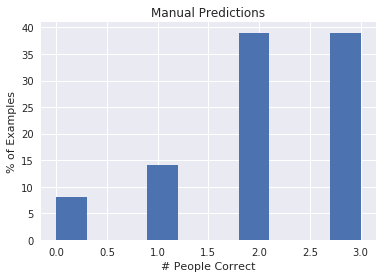

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.hist(accuracies.values())
plt.title('Manual Predictions')
plt.xlabel('# People Correct')
plt.ylabel('% of Examples')
plt.show()

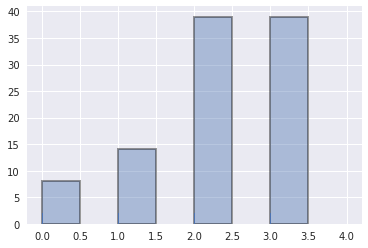

In [91]:
sns.distplot(accuracies.values(), kde=False, bins=4, rug=True, hist_kws=dict(range=(0,4), edgecolor="k", linewidth=2, width=.5))
sns.despine()
